Problem Statement:

The dataset is in zipped format. We have to extract the dataset in the program,
visualize the number of male and female babies born in a particular year, and
find out popular baby names.

Description:

This project not only focuses on implementing data manipulation and data
visualization using pandas library but also tests your ability to deal with real word
problem statements.

Hints:

● First, use pandas, zipfile and BytesIO library to extract the data. Find out a
way to extract only files that consist of useful data

● Hint: pd.read_csv(BytesIO(z.read(file_name)), encoding='utf-8',
engine='python', header=None)

● Then, visualize the number of male and female babies born in a particular
year with the help of pandas. DataFrame.plot, then analyze baby names
by sorting out all birth counts

● Then, analyze baby names by sorting out top 100 birth counts and group
them by names to find out popular baby names

In [63]:
import pandas as pd
import zipfile
from io import BytesIO
import matplotlib.pyplot as plt

In [65]:
data = []

In [67]:
with zipfile.ZipFile('/Users/dharyavardhan/Documents/Coding/names.zip', 'r') as z:
    
    # Loop over each file
    for filename in z.namelist():
        
        # If the file is a .txt file
        if filename.endswith('.txt'):
            
            # Read the file into a pandas DataFrame
            df = pd.read_csv(BytesIO(z.read(filename)), encoding='utf-8', engine='python', header=None)
            
            # Rename the columns
            df.columns = ['name', 'sex', 'births']
            
            # Add a 'year' column
            df['year'] = filename[3:7]
            
            # Append the DataFrame to the list
            data.append(df)

In [68]:
data

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],
            name sex  births  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1929     Wiliam   M       5  1881
 1930     Wilton   M       5  1881
 1931       Wing   M       5  1881
 1932       Wood   M       5  1881
 1933     Wright   M       5  1881
 
 [1934 rows x 4 columns],
            name sex  births  year
 0          Mary   F    8148  1882
 1          Anna   F    3143  1882

In [71]:
#dataset = pd.DataFrame(data, columns = ['Name', 'Gender', 'Year', 'Count'])

In [73]:
dataset = pd.concat(data, ignore_index=True)

In [87]:
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117219 entries, 0 to 2117218
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 64.6+ MB


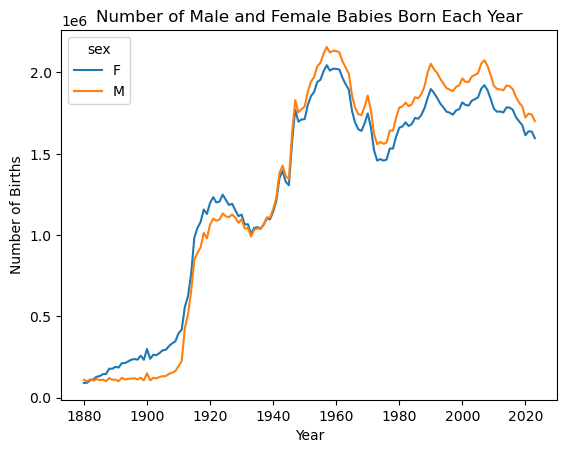

In [103]:
dataset.groupby(['year', 'sex']).births.sum().unstack().plot()
plt.title('Number of Male and Female Babies Born Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.show()

In [93]:
dataset.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [95]:
sorted_counts = dataset.sort_values('births', ascending=False)

In [97]:
top_names = sorted_counts.head(100).groupby('name').births.sum().sort_values(ascending=False)

print("Popular Baby Names:")
print(top_names)

Popular Baby Names:
name
James      1808602
Michael    1768207
John       1525076
Robert     1467533
David       978165
Linda       441337
Mary        219694
Name: births, dtype: int64
